In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import os
from astropy import units as u
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import warnings
warnings.filterwarnings('ignore')

In [2]:
Ha_3_4 = get_pkg_data_filename('Mean_NGC2174_Halpha_3_4.FIT')
Hb_3_4 = get_pkg_data_filename('Mean_NGC2174_Hbeta_3_4.FIT')
Ha_3_16 = get_pkg_data_filename('Mean_NGC2174_Halpha_3_16.FIT')
Hb_3_16 = get_pkg_data_filename('Mean_NGC2174_Hbeta_3_16.FIT')

NGC2173_Ha_3_4 = fits.getdata(Ha_3_4)
NGC2173_Hb_3_4 = fits.getdata(Hb_3_4)
NGC2173_Ha_3_16 = fits.getdata(Ha_3_16)
NGC2173_Hb_3_16 = fits.getdata(Hb_3_16)

In [3]:
numer = 2.5*np.log10(2.86*(NGC2173_Hb_3_4 / NGC2173_Ha_3_4))

In [4]:
def a(l):
    x = 1 / l
    y = x - 1.82
    a_value = 1 + 0.104*y - 0.609*y**2 + 0.701*y**3 + 1.137*y**4 - 1.718*y**5 - 0.827*y**6 + 1.647*y**7 - 0.505*y**8
    return a_value

def b(l):
    x = 1 / l
    y = x - 1.82
    b_value = 1.952*y + 2.908*y**2 - 3.989*y**3 - 7.985*y**4 + 11.102*y**5 + 5.491*y**6 - 10.805*y**7 + 3.347*y**8
    return b_value

In [5]:
Halpha_lambda = 656.3 * u.nm
Halpha_lambda = Halpha_lambda.to(u.micron).value
Hbeta_lambda = 486.1 * u.nm
Hbeta_lambda = Hbeta_lambda.to(u.micron).value

R_V = 5

In [6]:
denom = a(Halpha_lambda) + b(Halpha_lambda) / R_V - (a(Hbeta_lambda) + b(Hbeta_lambda) / R_V)

In [7]:
A_v = numer / denom

Text(0.5, 1.0, '$A_V$ Extinction Image')

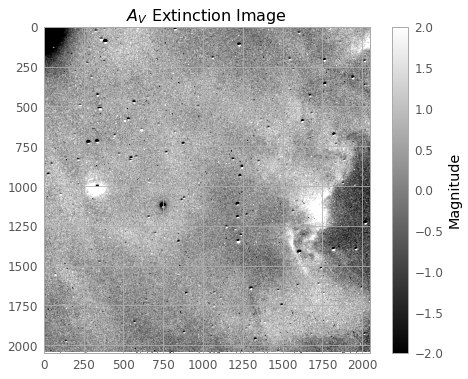

In [22]:
plt.imshow(A_v, cmap='gray', vmin=-2, vmax=2)
plt.colorbar(label='Magnitude')
plt.title(r'$A_V$ Extinction Image', size=16)